In [1]:
# Import pustaka yang diperlukan
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from CSV
data = pd.read_csv("D:\\KULIAH\\SEMESTER 7\\MACHINE LEARNING\\teachingMLDL\\01. Machine Learning\\02. Week 2\\Dataset\\FinancialMarket.csv")

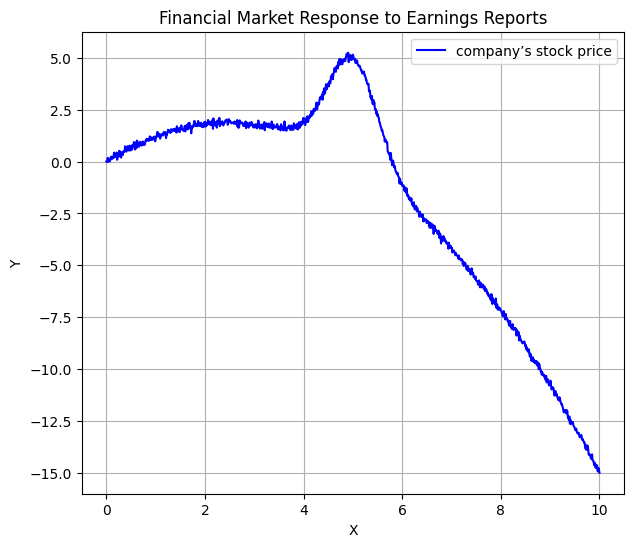

In [3]:
import matplotlib.pyplot as plt
# Extract the x and combined data columns
x = data['x'].values
combined_data = data['combined_data'].values

# Step 3: Visualize the dataset
plt.figure(figsize=(7, 6))

# Plot the combined data
plt.plot(x, combined_data, label='company’s stock price', color='blue')

# Add labels and title
plt.title('Financial Market Response to Earnings Reports')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()  # Ensure there's a label to show in the legend

# Display the plot
plt.show()

In [4]:
X = data[['x']]  # Mengambil fitur 'x'
y = data['combined_data']  # Mengambil target 'combined_data'
# ------------------- Regresi Linear Sederhana -------------------

# Langkah 1: Inisialisasi dan latih model Regresi Linear Sederhana
linear_reg = LinearRegression()  # Membuat instance dari model LinearRegression
linear_reg.fit(X, y)  # Melatih model pada fitur 'X' dan target 'y'

# Langkah 2: Membuat prediksi menggunakan model Regresi Linear Sederhana
y_pred_linear = linear_reg.predict(X)  # Memprediksi 'y' menggunakan model regresi linear yang telah dilatih

# Langkah 3: Evaluasi model Regresi Linear Sederhana
mse_linear = mean_squared_error(y, y_pred_linear)  # Menghitung Mean Squared Error
rmse_linear = np.sqrt(mse_linear)  # Menghitung Root Mean Squared Error
mae_linear = mean_absolute_error(y, y_pred_linear)  # Menghitung Mean Absolute Error
r2_linear = r2_score(y, y_pred_linear)  # Menghitung Nilai R²

In [5]:
# ------------------- Regresi dengan Basis Fungsi (RBF) -------------------

# Langkah 1: Terapkan transformasi Radial Basis Function (RBF) ke data input
rbf_feature = RBFSampler(gamma=1, n_components=100, random_state=42)  # Inisialisasi RBF dengan parameter
X_rbf = rbf_feature.fit_transform(X)  # Mengubah data asli 'X' menjadi fitur RBF

# Langkah 2: Inisialisasi dan latih model Regresi Linear pada fitur yang ditransformasi oleh RBF
rbf_reg = LinearRegression()  # Membuat instance baru dari LinearRegression untuk data yang ditransformasi oleh RBF
rbf_reg.fit(X_rbf, y)  # Melatih model menggunakan fitur yang ditransformasi oleh RBF

# Langkah 3: Membuat prediksi menggunakan model Regresi Linear berbasis RBF
y_pred_rbf = rbf_reg.predict(X_rbf)  # Memprediksi 'y' menggunakan model regresi linear berbasis RBF

# Langkah 4: Evaluasi model Regresi dengan Basis Fungsi RBF
mse_rbf = mean_squared_error(y, y_pred_rbf)  # Menghitung Mean Squared Error
rmse_rbf = np.sqrt(mse_rbf)  # Menghitung Root Mean Squared Error
mae_rbf = mean_absolute_error(y, y_pred_rbf)  # Menghitung Mean Absolute Error
r2_rbf = r2_score(y, y_pred_rbf)  # Menghitung Nilai R²

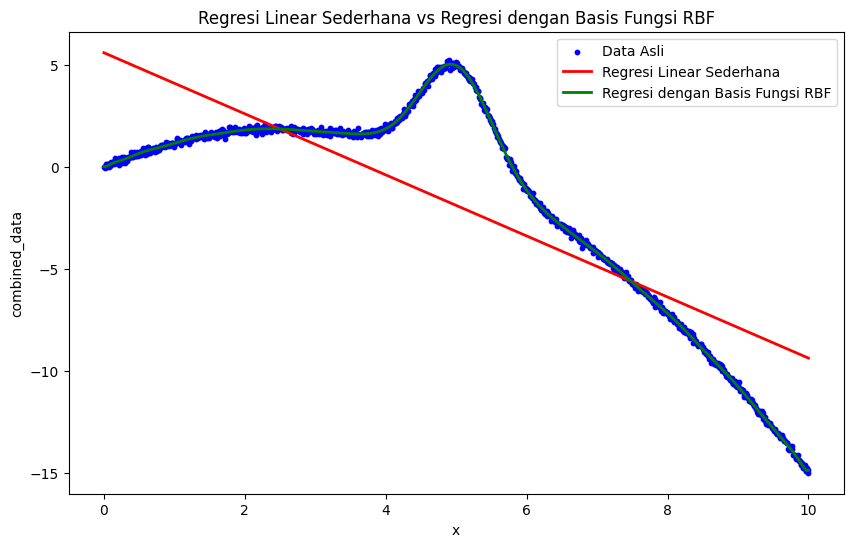

In [6]:
# ------------------- Visualisasi Hasil -------------------

# Membuat scatter plot untuk data asli
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
plt.scatter(X, y, color='blue', label='Data Asli', s=10)  # Plot data asli dalam warna biru

# Plot prediksi dari Regresi Linear Sederhana
plt.plot(X, y_pred_linear, color='red', label='Regresi Linear Sederhana', linewidth=2)  # Plot garis regresi linear sederhana dalam warna merah

# Plot prediksi dari Regresi dengan Basis Fungsi RBF
plt.plot(X, y_pred_rbf, color='green', label='Regresi dengan Basis Fungsi RBF', linewidth=2)  # Plot garis regresi berbasis RBF dalam warna hijau

# Menambahkan judul dan label sumbu pada plot
plt.title('Regresi Linear Sederhana vs Regresi dengan Basis Fungsi RBF')  # Menambahkan judul pada plot
plt.xlabel('x')  # Label sumbu X
plt.ylabel('combined_data')  # Label sumbu Y
plt.legend()  # Menampilkan legenda pada plot
plt.show()  # Menampilkan plot

In [7]:
# ------------------- Perbandingan Metrik Evaluasi -------------------

# Membuat perbandingan metrik untuk kedua model
metrics_comparison = pd.DataFrame({
    'Metrik': ['MSE', 'RMSE', 'MAE', 'R2'],  # Menentukan metrik yang akan dievaluasi
    'Regresi Linear': [mse_linear, rmse_linear, mae_linear, r2_linear],  # Menambahkan metrik untuk Regresi Linear Sederhana
    'Regresi Basis Fungsi RBF': [mse_rbf, rmse_rbf, mae_rbf, r2_rbf]  # Menambahkan metrik untuk Regresi Basis Fungsi RBF
})

# Menampilkan perbandingan metrik
metrics_comparison  # Menampilkan DataFrame dengan perbandingan metrik

,Metrik,Regresi Linear,Regresi Basis Fungsi RBF
0,MSE,9.887619,0.009663
1,RMSE,3.144458,0.098298
2,MAE,2.501160,0.078242
3,R2,0.654748,0.999663
